In [1]:
import pandas as pd

In [2]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/Credit.csv")

In [3]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
import seaborn as sb

In [5]:
import matplotlib.pyplot as plt

In [9]:
X=A.drop(labels=["Unnamed: 0","ID","Limit"],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)


In [10]:
Y=A[["Limit"]]

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
dtr=DecisionTreeRegressor(random_state=30)
model=dtr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest,pred))

211.6875


In [19]:
model.feature_importances_

array([8.20629926e-04, 9.92718630e-01, 1.22912699e-03, 2.70791165e-03,
       6.73229687e-04, 2.09346341e-04, 3.82010449e-08, 4.61296611e-04,
       3.81582732e-04, 7.98207815e-04])

In [20]:
X.columns

Index(['Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student',
       'Married', 'Ethnicity', 'Balance'],
      dtype='object')

<BarContainer object of 10 artists>

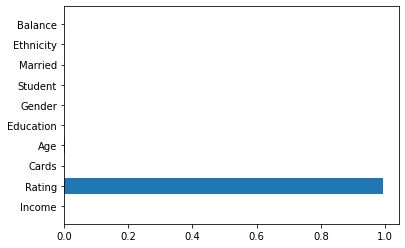

In [25]:
plt.barh(X.columns,model.feature_importances_)

In [15]:
from sklearn.tree import export_graphviz

In [17]:
export_graphviz(dtr,out_file="F:/data science workshop/DATA-SET/dtr_10am.dot")

In [33]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor(random_state=20)
tp={"max_depth":[2,3,4,5,6,7,8,9,10,11,12]}
gcv=GridSearchCV(dt,tp,scoring="neg_mean_squared_error",cv=4)
gcvmodel=gcv.fit(xtrain,ytrain)
print(gcvmodel.best_params_)


dtr1=DecisionTreeRegressor(max_depth=5,random_state=30)
model1=dtr1.fit(xtrain,ytrain)
pred1=model1.predict(xtest)
print(mean_absolute_error(ytest,pred1))

{'max_depth': 5}
208.12383207070707


In [36]:
from sklearn.tree import export_graphviz


In [39]:
export_graphviz(dtr1,out_file="F:/data science workshop/DATA-SET/data.dot")

In [34]:
from sklearn.model_selection import GridSearchCV
dt3=DecisionTreeRegressor(random_state=20)
tp={"min_samples_split":[2,3,4,5,6,7,8,9,10,11,12]}
gcv=GridSearchCV(dt3,tp,scoring="neg_mean_squared_error",cv=4)
gcvmodel=gcv.fit(xtrain,ytrain)
print(gcvmodel.best_params_)

dtr5=DecisionTreeRegressor(min_samples_split=2,random_state=30)
model5=dtr5.fit(xtrain,ytrain)
pred5=model5.predict(xtest)
print(mean_absolute_error(ytest,pred5))

{'min_samples_split': 2}
211.6875


In [30]:
for i in range(2,20):
    dtt=DecisionTreeRegressor(max_depth=i,random_state=20)
    model2=dtt.fit(xtrain,ytrain)
    pred2=model2.predict(xtest)
    print(i,mean_absolute_error(ytest,pred2))

2 716.6520670690037
3 368.3785694406347
4 241.81302555899975
5 208.12383207070707
6 195.68426365301366
7 211.25026898448778
8 218.5424107142857
9 212.11020833333333
10 206.678125
11 222.3925
12 210.95
13 207.3125
14 229.2
15 229.2
16 229.2
17 229.2
18 229.2
19 229.2


In [31]:
for i in range(2,20):
    dtt=DecisionTreeRegressor(min_samples_split=i,random_state=20)
    model2=dtt.fit(xtrain,ytrain)
    pred2=model2.predict(xtest)
    print(i,mean_absolute_error(ytest,pred2))

2 229.2
3 207.375
4 204.01458333333335
5 213.94375
6 225.47312499999998
7 225.60104166666665
8 211.17872023809522
9 207.9422619047619
10 222.3730853174603
11 225.06009920634924
12 215.69814935064932
13 214.20556457431456
14 212.04428349428355
15 218.4728274503275
16 221.5732441169941
17 232.1775670336608
18 220.59955232777847
19 220.59955232777847
